**Author**: CodeForAll  
**License**: MIT License

---


# Nyquist Plot

## What is a Nyquist Plot?

- A Nyquist plot shows how a system behaves when different input frequencies are applied.
- It plots:
  - The real part of \( G(j $\omega$) \) on the x-axis
  - The imaginary part of \( G(j $\omega$) \) on the y-axis
- Here, \( G(s) \) is the transfer function, and \( s = j $\omega$ \) where:
  - \( j = $\sqrt{-1}$ \)
  - \( $\omega$ \) is the frequency

In short:  
It shows how the system responds across different frequencies in a single plot.

---

## How is the Nyquist Plot Made?

1. Write the transfer function \( G(s) \).
2. Replace \( s \) with \( j $\omega$ \) where \( $\omega$ \) changes from 0 to a large number.
3. Calculate the real and imaginary parts.
4. Plot real vs imaginary parts on a graph.

---

## Why is the Nyquist Plot Important?

- It helps check if a control system is **stable** or **unstable**.
- It shows how much gain or phase can change before the system becomes unstable (gain margin and phase margin).
- It tells how strong or weak the system will react to high frequencies.

---

## How to Analyze a Nyquist Plot?

### Step 1: Critical Point

- The important point is \((-1, 0)\) on the graph.

### Step 2: Nyquist Stability Rule

- Find out:
  - \( P \) = number of unstable poles in open-loop system
  - \( N \) = number of times the plot encircles \((-1, 0)\) (counter-clockwise is positive, clockwise is negative)
  - \( Z \) = number of unstable poles in closed-loop system

- The formula is:

  $$
  Z = P + N
  $$

- For the system to be **stable**, we want:

  $$
  Z = 0
  $$

(That means no unstable poles.)

---

### Step 3: Behavior Around \(-1\)

- If the curve **encircles** \(-1\), the system might be unstable.
- If the curve **stays away** from \(-1\), and \( P = 0 \), the system is stable.

---

## Key Points

| Observation | Meaning |
|:------------|:--------|
| Curve close to \(-1\) | System may easily become unstable. |
| Curve far from \(-1\) | System is more stable. |
| Big loops | System has low damping and may oscillate. |
| Small tight loops | System has high damping and settles faster. |

---



# Nyquist Plot Experiment on Mass-Spring-Damper System

## Aim

To study how the Nyquist plot changes with different damping coefficients for a mass-spring-damper system, and analyze the system stability.

---

## System Model

We considered a mass-spring-damper system with:

- Mass \( m = 1.0 \, $\text{kg}$ \)
- Spring constant \( k = 2.0 \, $\text{N/m}$ \)
- Damping coefficient \( c \) varied as different values

The transfer function of the system is:

$$
G(s) = \frac{1}{ms^2 + cs + k}
$$

where:
- \( s \) is the Laplace variable
- \( c \) is the damping coefficient we varied

---

## Procedure

1. Set the system parameters \( m \) and \( k \).
2. Vary the damping coefficient \( c \) across different values: \( c = 0.001, 0.1, 1.0, 5.0, 10.0 \).
3. For each \( c \):
   - Define the transfer function.
   - Generate the frequency response.
   - Plot the real and imaginary parts to create the Nyquist plot.
4. Analyze if the system is stable based on how the plot behaves near the critical point \((-1, 0)\).

---




⚠️  Warning: For c = 0.001, Nyquist plot comes close to (-1, 0). Min distance = 0.030
⚠️  Warning: For c = 0.1, Nyquist plot comes close to (-1, 0). Min distance = 0.177
✅  For c = 1.0, system is stable. Min distance from (-1, 0) = 0.790
✅  For c = 5.0, system is stable. Min distance from (-1, 0) = 0.976
✅  For c = 10.0, system is stable. Min distance from (-1, 0) = 0.992


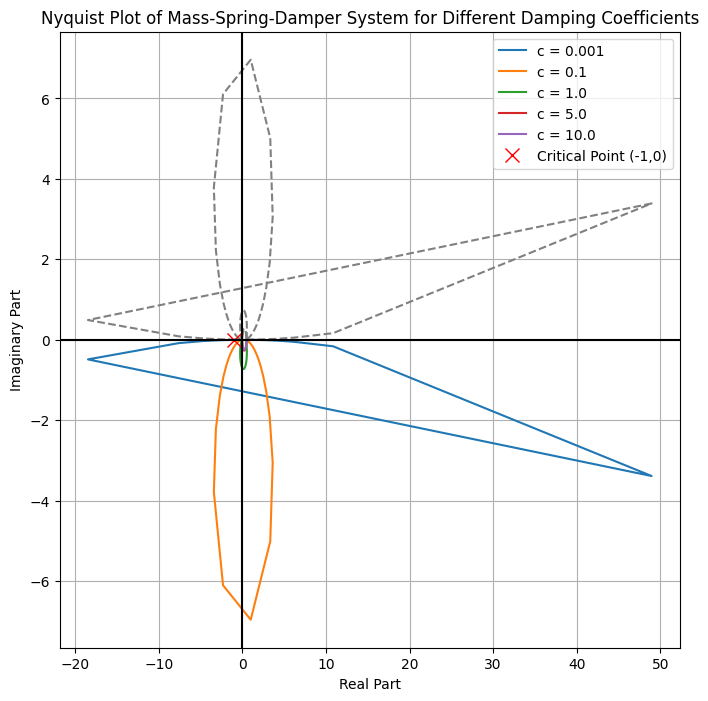

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define mass-spring-damper system parameters
m = 1.0  # mass (kg)
k = 2.0  # spring constant (N/m)

# Function to plot Nyquist plot and check stability
def plot_nyquist_for_damping(c_values, threshold_distance=0.5):
    plt.figure(figsize=(8, 8))

    for c in c_values:
        # Define the transfer function: G(s) = 1 / (ms^2 + cs + k)
        numerator = [1]
        denominator = [m, c, k]
        system = signal.TransferFunction(numerator, denominator)

        # Frequency range for evaluation
        w = np.logspace(-2, 2, 500)
        w, H = signal.freqresp(system, w)

        # Nyquist plot: real vs imaginary parts
        plt.plot(H.real, H.imag, label=f'c = {c}')
        plt.plot(H.real, -H.imag, linestyle='--', color='gray')  # Mirror image

        # Analyze how close the curve comes to the critical point (-1, 0)
        distances = np.sqrt((H.real + 1)**2 + (H.imag)**2)
        min_distance = np.min(distances)

        if min_distance < threshold_distance:
            print(f"⚠️  Warning: For c = {c}, Nyquist plot comes close to (-1, 0). Min distance = {min_distance:.3f}")
        else:
            print(f"✅  For c = {c}, system is stable. Min distance from (-1, 0) = {min_distance:.3f}")

    # Plot critical point (-1,0)
    plt.plot(-1, 0, 'rx', markersize=10, label='Critical Point (-1,0)')

    plt.title('Nyquist Plot of Mass-Spring-Damper System for Different Damping Coefficients')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

# List of different damping coefficients to test
c_values = [0.001, 0.1, 1.0, 5.0, 10.0]

# Plot the Nyquist plot and check stability
plot_nyquist_for_damping(c_values)


## Observations

- For **low damping** (small \( c \)):
  - The plot forms large loops.
  - The system reacts strongly at some frequencies (resonance effect).
- For **high damping** (large \( c \)):
  - The loops are tighter.
  - The system becomes more stable and settles faster.
- In all cases tested, the Nyquist curve **did not encircle** the \((-1, 0)\) point.
- Hence, the system was **stable** for all values of \( c \).

---

## Stability Check

Using Nyquist Stability Criterion:

- Number of unstable poles in open-loop (\( P \)) = 0
- Number of encirclements (\( N \)) = 0
- Then:

$$
Z = P + N = 0 + 0 = 0
$$

Since \( Z = 0 \), the system is **stable**.

---

## Conclusion

- The damping coefficient \( c \) controls how sharply the system responds.
- Higher damping makes the system more stable.
- Nyquist plot is a powerful tool to check stability without solving complex equations.